#### 4. Develop a program to recognize digits using CNN.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers # type: ignore
from tensorflow.keras import Sequential  # type: ignore
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
model = Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/5
938/938 [==============================] - 17s 17ms/step - loss: 0.1809 - accuracy: 0.9452 - val_loss: 0.0463 - val_accuracy: 0.9844
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0510 - accuracy: 0.9842 - val_loss: 0.0388 - val_accuracy: 0.9875
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0411 - val_accuracy: 0.9866
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0219 - accuracy: 0.9935 - val_loss: 0.0299 - val_accuracy: 0.9911


In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0299 - accuracy: 0.9911
Test Loss: 0.0299
Test Accuracy: 99.11%


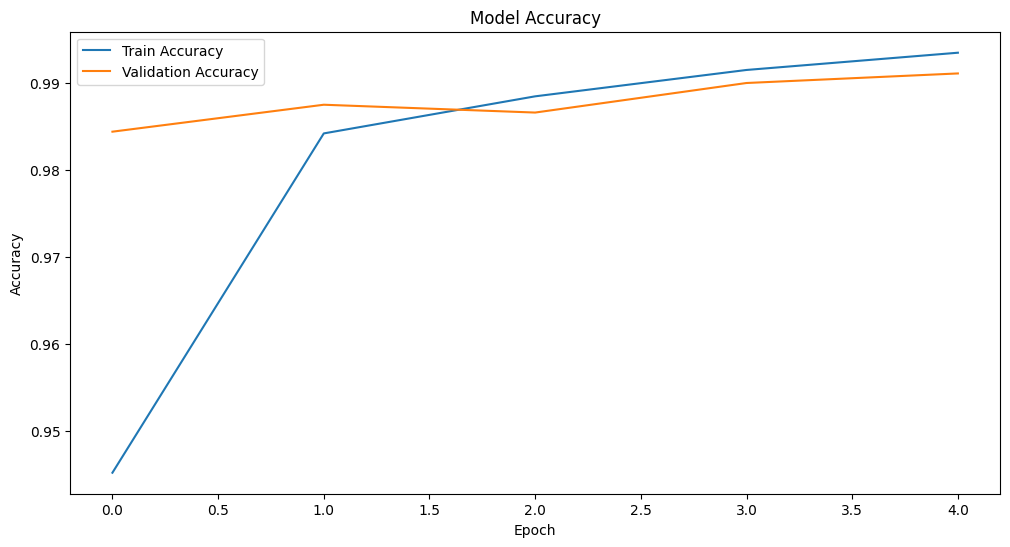

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**OPTIONAL**

In [11]:
import numpy as np

index = np.random.randint(0, X_test.shape[0])
image = X_test[index]

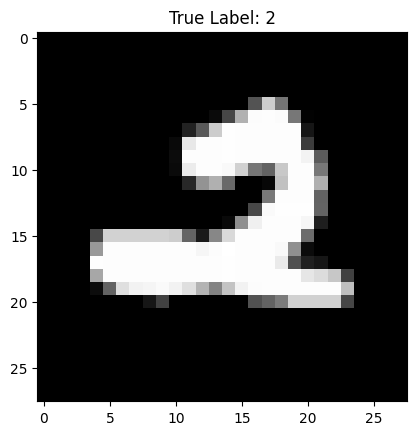

In [12]:
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {np.argmax(y_test[index])}")
plt.show()

In [13]:
image = image.reshape(1, 28, 28, 1)

In [14]:
predicted_class = model.predict(image)
predicted_label = np.argmax(predicted_class)

print(f"Predicted Label: {predicted_label}")


1/1 [==============================] - 0s 85ms/step
Predicted Label: 2
